#                        BOOK RECOMMENDATION SYSTEM

## Let's check our dataset

In [10]:
# First of all reading the csv file 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
book = pd.read_csv('best_books_ever.csv')
book.shape

(52478, 25)

In [11]:
book.head(20)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,Alfred A. Knopf,03/14/06,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,Signet Classics,04/28/96,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['

In [12]:
# Checking the nan values in our dataset

book.isnull().sum()/len(book)

bookId              0.000000
title               0.000000
series              0.552765
author              0.000000
rating              0.000000
description         0.025496
language            0.072526
isbn                0.000000
genres              0.000000
characters          0.000000
bookFormat          0.028069
edition             0.905579
pages               0.044724
publisher           0.070430
publishDate         0.016769
firstPublishDate    0.406380
awards              0.000000
numRatings          0.000000
ratingsByStars      0.000000
likedPercent        0.011853
setting             0.000000
coverImg            0.011529
bbeScore            0.000000
bbeVotes            0.000000
price               0.273734
dtype: float64

In [13]:
# check the types of the columns
book.dtypes

bookId               object
title                object
series               object
author               object
rating              float64
description          object
language             object
isbn                 object
genres               object
characters           object
bookFormat           object
edition              object
pages                object
publisher            object
publishDate          object
firstPublishDate     object
awards               object
numRatings            int64
ratingsByStars       object
likedPercent        float64
setting              object
coverImg             object
bbeScore              int64
bbeVotes              int64
price                object
dtype: object

## After checking the nan values, lets dive into every column and select our features.

 - Seems like "bookID" is not useful for modeling i wont use this column for sure (title is already fine for our project).
   So lets drop bookID column

 - 'Series' column is actually nice to have it
   For diving into analysis it could be useful, but for my modeling i am not going to use it

 - For this step i havent decided yet to use the 'description' column.. so i will not drop it.. 
    just gonna change the nan values as unknown
 
 - 'Language' column should remain.. so im going to change the null valus with the most repeated one 'english'.
   I dont want to drop the nan values its 7 percent of the dataset
   
 - 'isbn' is not necessery but i will not drop in this part
 
 - 'genres' i will seperate the genres as different columns. One book has different genres so i will make it numerical 
 
 - 'characters' our main focus is on book recommendation and its features.. so i decided not to use this column as features
 
 - 'bookFormat' i cleaned it as most common ones.. this method is good for encoding
 
 - 'edition' has 90 percent null values.. and i am not going to use this column as feature
 
 - 'pages' one of the important column for me for the clustering purposes. I will fill null values with the mean of pages.
 
 - 'publisher' for the EDA its good to have it. But for our modelling we drop it.
 
 - 'firstPublishDate' and 'publishdate' i will not use it for modelling.
 
 - 'awards' i am gonna keep it as sum of awards of a book. So we can analyze how many awards a book got.
 
 - 'numRatings' i will keep it  
 
 - 'ratingsByStars' this column is confusing so i will drop it.
 
 - 'likedpercent' 99percent of the data is here.. i will fillna with the mean value
 
 - 'setting' we dont need that column. Otherwise its gonna be confusing to have it. and we have the description so its fine.
 
 - 'coverImg' drop that column
 
 - 'bbeScore' Score in Best Books Ever list we gonna keep this column
 
 - 'bbeVotes' Number of votes in Best Books Ever list
 
 - 'price' Book's price (extracted from Iberlibro) keep it. i dont want to drop the nan values. so i will fillna.mean

### Lets data wrangling :)

In [14]:
book['description'].fillna('Unknown',inplace=True)

In [15]:
book['language'].fillna('English',inplace=True)

In [16]:
book['fantasy'] = np.where(book['genres'].str.contains("Fantasy", case=False, na=False), 1, 0)
book['adventure'] = np.where(book['genres'].str.contains("Adventure", case=False, na=False), 1, 0)
book['sci_fi'] = np.where(book['genres'].str.contains("Science Fiction", case=False, na=False), 1, 0)
book['crime_and_thriller'] = np.where(book['genres'].str.contains("Crime" or "Thriller", case=False, na=False), 1, 0)
book['horror_and_mistery'] = np.where(book['genres'].str.contains("Horror" or "Mistery", case=False, na=False), 1, 0)
book['romantic'] = np.where(book['genres'].str.contains("Romantic", case=False, na=False), 1, 0)
book['humor'] = np.where(book['genres'].str.contains("Humor", case=False, na=False), 1, 0)
book['poetry'] = np.where(book['genres'].str.contains("Poetry", case=False, na=False), 1, 0)
book['classics'] = np.where(book['genres'].str.contains("Classics", case=False, na=False), 1, 0)
book['drama'] = np.where(book['genres'].str.contains("Drama", case=False, na=False), 1, 0)
book['young_adult'] = np.where(book['genres'].str.contains("Young Adult", case=False, na=False), 1, 0)
book['childrens'] = np.where(book['genres'].str.contains("Childrens", case=False, na=False), 1, 0)
book['historical'] = np.where(book['genres'].str.contains("Historical", case=False, na=False), 1, 0)
book['contemporary'] = np.where(book['genres'].str.contains("Contemporary", case=False, na=False), 1, 0)
book['graphic'] = np.where(book['genres'].str.contains("Graphic", case=False, na=False), 1, 0)
book['nonfiction'] = np.where(book['genres'].str.contains("Nonfiction", case=False, na=False), 1, 0)
book['philosophy'] = np.where(book['genres'].str.contains("Philosophy", case=False, na=False), 1, 0)
book['feminism'] = np.where(book['genres'].str.contains("Feminism", case=False, na=False), 1, 0)
book['gender'] = np.where(book['genres'].str.contains("Gender", case=False, na=False), 1, 0)
book['fiction'] = np.where(book['genres'].str.contains("Fiction", case=False, na=False), 1, 0)

In [17]:
#Cleaning the edition column
def clean(x):
    if x in ['Paperback', 'Hardcover']:
        return 'Paper'
    elif x in ['Kindle Edition']:
        return 'Kindle Edition'
    elif x in ['Mass Market Paperback']:
        return 'Paper'
    elif x in ['ebook']:
        return 'ebook'
    else:
        return 'Paper'
    
book['bookFormat'] = list(map(clean, book['bookFormat']))

In [18]:
book['pages'] =  pd.to_numeric(book['pages'], errors='coerce')

page = book['pages'].mean()
book['pages'] = book['pages'].fillna(page)
book['pages'] = book['pages'].round()

In [19]:
awards = book["awards"].str.split(',', expand=True)
for col in awards.columns:
    awards[col] = np.where(awards[col].str.contains("'", case=False, na=False), 1, 0)

awards['awards_number']= awards.sum(axis=1)
book["awards_number"] = awards["awards_number"]

In [20]:
likes = book['likedPercent'].mean()
book['likedPercent'] = book['likedPercent'].fillna(likes)

In [21]:
book['price'] =  pd.to_numeric(book['price'], errors='coerce')
book['price'] = book['price'].fillna(book['price'].mean())
book['price'] = book['price'].round(2)

In [22]:
book = book.drop(["bookId", "series", "genres", "awards", "isbn", "characters", "edition", "publisher", "publishDate", "firstPublishDate", "ratingsByStars", "setting", "coverImg"], axis=1)
book.head(4)

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,6376780,96.0,2993816,30516,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,2507623,98.0,2632233,26923,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,4501075,95.0,2269402,23328,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,Paper,279.0,2998241,94.0,1983116,20452,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [23]:
book[book['awards_number'] != 0]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,6376780,96.0,2993816,30516,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,2507623,98.0,2632233,26923,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,4501075,95.0,2269402,23328,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Paper,501.0,4964519,78.0,1459448,14874,2.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25
5,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,Paper,552.0,1834276,96.0,1372809,14168,3.80,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52451,Mr. Tiger Goes Wild,Peter Brown,4.18,Are you bored with being so proper?\nDo you wa...,English,Paper,40.0,7032,96.0,1,1,5.20,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,6
52463,The Natural Way of Things,Charlotte Wood,3.53,Two women awaken from a drugged sleep to find ...,English,Paper,320.0,10894,84.0,1,1,10.37,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,8
52465,Arafel's Saga,C.J. Cherryh (Goodreads Author),3.69,"Journey to a transitional time in the world, a...",English,Paper,408.0,1070,87.0,1,1,5.18,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
52470,Attracted to Fire,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,Paper,416.0,2143,95.0,0,1,5.55,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [24]:
# On this level, our dataset looks like that
book.shape

(52478, 33)

## EDA, Wrangling, Diving into data.. Interesting aspects

In [25]:
print("Total records : ",len(book))
print("Number of books : {0}".format(len(book.title.unique())))
print("Number of authors : {0}".format(len(book.author.unique())))

Total records :  52478
Number of books : 49927
Number of authors : 28227


In [26]:
# Avarage rating
book.rating.mean()

4.021877929799144

In [27]:
book[book["price"] > 890]

# This price column seems really weird, so i guess its a special edition

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number
32984,I See by My Outfit,Peter S. Beagle (Goodreads Author),4.11,"In 1963, Dr. Martin Luther King Jr. articulate...",English,Paper,238.0,379,96.0,92,1,898.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
## Best books

book[(book["rating"] == 5) & (book["awards_number"] > 0)]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number
23659,De que João Pessoa tem Medo? Uma abordagem em ...,Mauro Guilherme Pinheiro Koury,5.0,Este livro objetiva discutir sobre o que é med...,Portuguese,Paper,161.0,3,100.000000,98,1,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25692,"Emoções, Sociedade e Cultura",Mauro Guilherme Pinheiro Koury,5.0,"Emoções, Sociedade e Cultura é um livro que di...",Portuguese,Paper,104.0,4,100.000000,97,1,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33319,"You, My Love: A Diary in Verse",Richard Atwood (Goodreads Author),5.0,13 January You are into melike flame and firea...,English,Paper,116.0,5,100.000000,92,1,8.99,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
51950,Furniture Of The New Zealand Colonial Era: An ...,William Cottrell,5.0,Unknown,English,Paper,591.0,2,92.231545,11,1,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [29]:
## MOST AWARDED Book
book["awards_number"].max()
book[(book["awards_number"] > 25)]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,6376780,96.0,2993816,30516,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41
10,The Fault in Our Stars,John Green (Goodreads Author),4.21,Despite the tumor-shrinking medical miracle th...,English,Paper,313.0,3550714,93.0,1087056,11287,9.66,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,28
32,Harry Potter and the Sorcerer's Stone,"J.K. Rowling, Mary GrandPré (Illustrator)",4.47,Harry Potter's life is miserable. His parents ...,English,Paper,309.0,7048471,96.0,691430,7348,9.66,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,28
5355,Escape from Mr. Lemoncello's Library,Chris Grabenstein (Goodreads Author),4.13,A New York Times BestsellerKyle Keeley is the ...,English,Paper,304.0,40946,94.0,546,6,2.80,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,27


In [30]:
### There are some rows without genres.. bcs of the langugage, its not assigned to any genres
## create a new column that name general, and assign it 1 for those rows that dont have genre

book["general"] = np.where((book["fantasy"] == 0) & (book["adventure"] == 0)& (book["sci_fi"] == 0)& (book["crime_and_thriller"] == 0)& (book["horror_and_mistery"] == 0)& (book["romantic"] == 0) & (book["humor"] == 0)& (book["poetry"] == 0)& (book["poetry"] == 0)& (book["classics"] == 0)& (book["drama"] == 0)& (book["young_adult"] == 0)& (book["childrens"] == 0)& (book["historical"] == 0)& (book["contemporary"] == 0)& (book["graphic"] == 0)& (book["nonfiction"] == 0)& (book["philosophy"] == 0)& (book["feminism"] == 0)& (book["gender"] == 0)& (book["fiction"] == 0), 1,0)

In [31]:
## We checked it and its crystal clear :)

book.head()

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,6376780,96.0,2993816,30516,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,2507623,98.0,2632233,26923,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,4501075,95.0,2269402,23328,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,Paper,279.0,2998241,94.0,1983116,20452,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Paper,501.0,4964519,78.0,1459448,14874,2.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,0


In [215]:
### Check the specific genre..

len(book[(book["romantic"] == 1) & (book["classics"] == 1)])
book[(book["rating"] < 0.01) & (book["awards_number"] == 0)]

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
8321,Her Beauty,M.R. Desmond (Goodreads Author),0.0,Two pie loving police officers are questioning...,English,Kindle Edition,30.0,92.231545,300,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17834,Mach Deine Träume Wahrverwirkliche Deine Ziele...,Roeland Suylen,0.0,Unknown,English,Paper,329.0,92.231545,100,4.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17907,Mindtronics! And Inquiry Alive!,William C. Bruce,0.0,Discrepant Events take Science and Social Stud...,English,Paper,329.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18197,Moon Secrets,J.J. Gregory (Goodreads Author),0.0,The short white called Wang and one of the stu...,English,Paper,336.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18618,Aphrodisiac Concupiscence Deluxe,Yolanda Williams (Goodreads Author),0.0,Unknown,English,Paper,62.0,92.231545,100,15.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18840,The Equanimity Knowledge,Benjamin N.Nweke,0.0,A book of three sections of Words on reasons i...,English,ebook,485.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19538,The Rising Tide,Nathan Preedy (Goodreads Author),0.0,Two gods are battling each other. During their...,English,Kindle Edition,329.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19564,"The Sea of Skeleton Voices (Poetry, #7)",Vanessa M Chattman,0.0,"The Sea of Skeleton Voices (Poetry, #7)- is a ...",English,Paper,26.0,92.231545,100,9.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19607,Why I Don't Want To Write This Book,"Asia Lewis, Josephine Hasan-Kerr",0.0,“Why I Don’t Want to Write This Book” :DDo som...,English,Kindle Edition,35.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19627,Mikauula,Michele Scalini (Goodreads Author),0.0,"Narra la storia di Mikauula, un alieno che viv...",Italian,ebook,329.0,92.231545,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
book["language"].unique()

array(['English', 'French', 'German', 'Persian', 'Arabic', 'Spanish',
       'Multiple languages', 'Portuguese', 'Indonesian', 'Turkish',
       'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian', 'Italian',
       'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu', 'Dutch',
       'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'Albanian', '

In [168]:
len(book["language"].unique())

81

In [34]:
#Top 3 high rated authors 
print("The authors got rated \"3\" in the records count")
authors = book.groupby('author')['rating'].apply(lambda x: x[x == 3].count()).sort_values(ascending=False)
authors = pd.DataFrame({'author': authors.index, 'number of rating 3': authors.values})[0:3]
authors

The authors got rated "3" in the records count


,author,number of rating 3
0,Abdul-Jabbar Khan,2
1,L'Poni Baldwin (Goodreads Author),2
2,Michael Zhang (Goodreads Author),2


In [35]:
#calculate the mean of book
columns = book[['title','rating']]
mean_ratings = columns.groupby(['title']).mean()
mean_ratings

,rating
title,
!از قر و قمبیل‌های قلمی بی‌قال و قیل,3.95
"""A Problem from Hell"": America and the Age of Genocide",4.23
"""Break the Casanova's Heart"" Operation",4.45
"""Dead Rock Stars""",4.76
"""El Aleph"" de Jorge Luis Borges",4.37
...,...
黒執事 XX [Kuroshitsuji XX],4.55
黒執事 XXI [Kuroshitsuji XXI],4.48
黒執事 XXII [Kuroshitsuji XXII],4.39


In [36]:
mean_ratings = mean_ratings.sort_values('rating',ascending=False)
mean_ratings

,rating
title,
Black Nationhood: Resurgence of African Consciousness,5.0
The Knight of the Dixie Wilds,5.0
The Secrets of Existence and Fulfilment,5.0
"Sur la Route d'Anfield, Liverpool",5.0
"Furniture Of The New Zealand Colonial Era: An Illustrated History, 1830 1900",5.0
...,...
Pornography: The Other Side,0.0
Bitter Fruit,0.0
"Six-Pack Abs: A Quick, Concise Guide To Obtaining And Keeping Toned Abdominal Muscles.",0.0


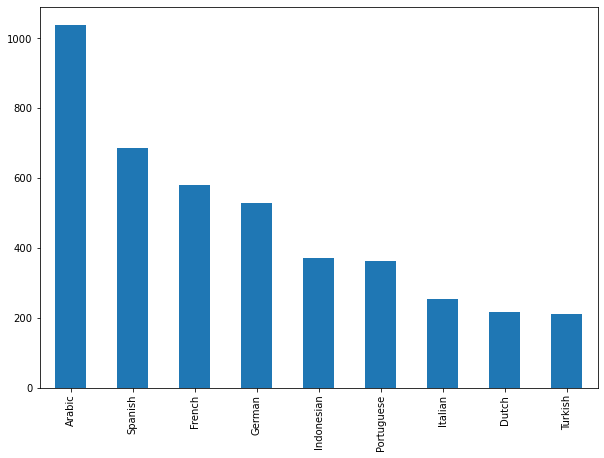

In [37]:
# English is by far a lot.. so i wanted to show the other language distribution


plt.subplots(figsize=(10,7))
book.language.value_counts()[1:10].plot(kind="bar")
plt.show()

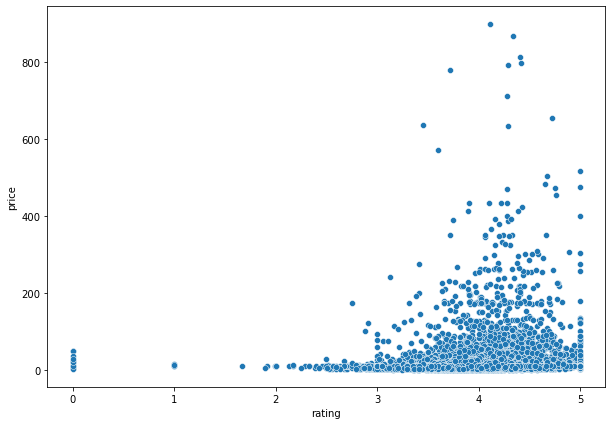

In [38]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='rating',y='price',data=book)
plt.show()

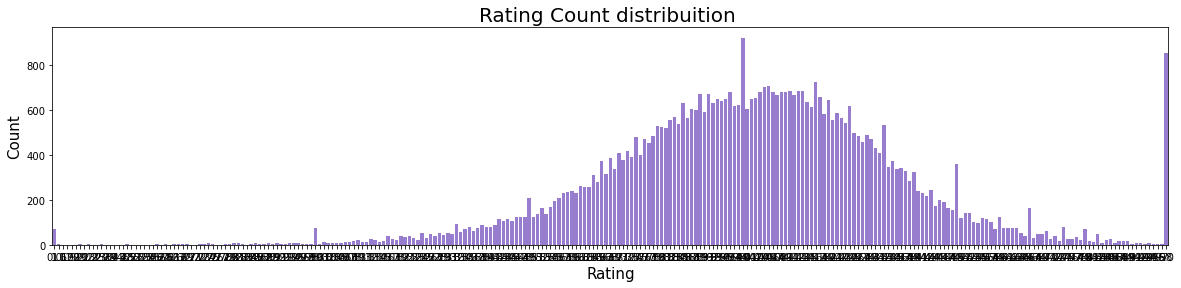

In [39]:
plt.figure(figsize=(20, 4))
graph = sns.countplot(x='rating', data=book, color='mediumpurple')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15) 
graph.set_ylabel("Count", fontsize=15)
plt.show()

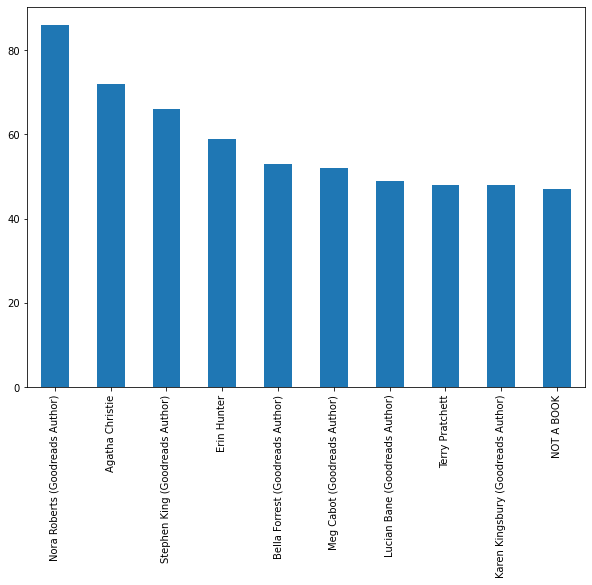

In [40]:
# TEN most active authors

plt.subplots(figsize=(10,7))
book.author.value_counts()[:10].plot(kind="bar")
plt.show()

In [41]:
book[(book["author"].str.contains("Nora Ro", case=False, na=False)) & (book["awards_number"] !=0) & (book["rating"] > 4.3)]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
8672,Born in Death,"J.D. Robb (Goodreads Author), Nora Roberts (Go...",4.36,Eve Dallas has a grisly double homicide to sol...,English,Paper,338.0,24670,98.0,289,6,3.12,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
17220,Survivor In Death,"J.D. Robb (Goodreads Author), Nora Roberts (Go...",4.40,No affairs. No criminal connections. No DNA. N...,English,Paper,360.0,26142,99.0,119,3,7.57,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
17503,Betrayal in Death,"J.D. Robb (Goodreads Author), Nora Roberts (Go...",4.31,"At the luxurious Roarke Palace Hotel, a maid w...",English,Paper,355.0,27871,98.0,109,3,7.53,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
49257,Divided in Death,"J.D. Robb (Goodreads Author), Nora Roberts (Go...",4.34,"Reva Ewing, a former member of the Secret Serv...",English,Paper,354.0,24209,99.0,43,1,2.55,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
50513,Visions in Death,"J.D. Robb (Goodreads Author), Nora Roberts (Go...",4.36,"On one of the city's hottest nights, New York ...",English,Paper,354.0,23404,99.0,31,1,5.68,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [42]:
best_authors = book.author.value_counts()[:6]
best_authors

Nora Roberts (Goodreads Author)     86
Agatha Christie                     72
Stephen King (Goodreads Author)     66
Erin Hunter                         59
Bella Forrest (Goodreads Author)    53
Meg Cabot (Goodreads Author)        52
Name: author, dtype: int64

In [43]:
book[(book["classics"] !=0) & (book["fantasy"] == 0) & (book["sci_fi"] == 0)]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,4501075,95.0,2269402,23328,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,Paper,279.0,2998241,94.0,1983116,20452,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
5,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,Paper,552.0,1834276,96.0,1372809,14168,3.80,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,20,0
9,Gone with the Wind,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,Paper,1037.0,1074620,94.0,1087732,11211,5.58,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2,0
13,Wuthering Heights,"Emily Brontë, Richard J. Dunn (Editor), David ...",3.86,You can find the redesigned cover of this edit...,English,Paper,464.0,1342664,88.0,981502,10275,2.73,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52394,The Rachel Papers,Martin Amis,3.59,"In his uproarious first novel Martin Amis, aut...",English,Paper,240.0,9319,87.0,2,1,2.36,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
52418,"დედა, მამა, რვა ბავშვი და საბარგო მანქანა",Anne-Cath. Vestly,4.38,"""იყო და არა იყო რა, ერთი დიდი, ძალიან დიდი ოჯა...",Georgian,Paper,184.0,559,97.0,2,1,9.66,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
52427,Requiem Edition Bilingue,"Anna Akhmatova, Paul Valet (Translator)",4.32,Ces poèmes qui forment le Requiem et dont on l...,Multiple languages,Paper,45.0,406,96.0,2,1,2.03,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52437,The Story of My Misfortunes,"Pierre Abélard, Henry Adams Bellows (Translato...",3.56,"In this classic of medieval literature, a bril...",English,Paper,128.0,418,85.0,1,1,3.89,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0


In [44]:
book[(book["author"].str.contains("Dostoyevsky", case=False, na=False))]

,title,author,rating,description,language,bookFormat,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
25,Crime and Punishment,"Fyodor Dostoyevsky, David McDuff (Translator)",4.22,"Raskolnikov, a destitute and desperate former ...",English,Paper,671.0,626897,94.0,759066,7937,18.85,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
85,The Brothers Karamazov,"Fyodor Dostoyevsky, Fyodor Dostoyevsky, Richar...",4.32,"The Brothers Karamazov is a murder mystery, a ...",English,Paper,796.0,243271,95.0,299610,3312,5.51,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
274,The Idiot,"Fyodor Dostoyevsky, Anna Brailovsky (Translato...",4.18,Returning to Russia from a sanitarium in Switz...,English,Paper,667.0,132551,95.0,47126,601,5.46,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1256,Notes from Underground,"Fyodor Dostoyevsky, Richard Pevear (Translator...",4.15,"Dostoevsky’s most revolutionary novel, Notes f...",English,Paper,136.0,83748,94.0,4264,49,11.64,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1278,Demons,"Fyodor Dostoyevsky, Richard Pevear (Translator...",4.28,Alternate Cover Edition ISBN 0679734511. (ISBN...,English,Paper,733.0,37311,96.0,4173,49,9.66,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2281,White Nights,Fyodor Dostoyevsky,4.02,"White Nights, is a short story by Fyodor Dosto...",English,Paper,82.0,48899,94.0,1675,20,9.66,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3226,"Notes from Underground, White Nights, The Drea...","Fyodor Dostoyevsky, Andrew R. MacAndrew (Trans...",4.18,A collection of powerful stories by one of the...,English,Paper,233.0,73782,95.0,1044,12,5.81,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3824,The Gambler,"Fyodor Dostoyevsky, Constance Garnett (Transla...",3.89,"In this dark and compelling short novel, Dosto...",English,Paper,188.0,54639,95.0,833,11,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
5360,The Insulted and Humiliated,"Fyodor Dostoyevsky, Natália Nunes (Tradutora)",4.23,"The Insulted & Injured, published soon after D...",English,Paper,460.0,14244,96.0,545,6,22.95,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
6782,The Dream Of A Ridiculous Man,Fyodor Dostoyevsky,4.02,A short story by Fyodor Dostoyevsky written in...,English,Paper,32.0,16005,94.0,394,4,11.27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


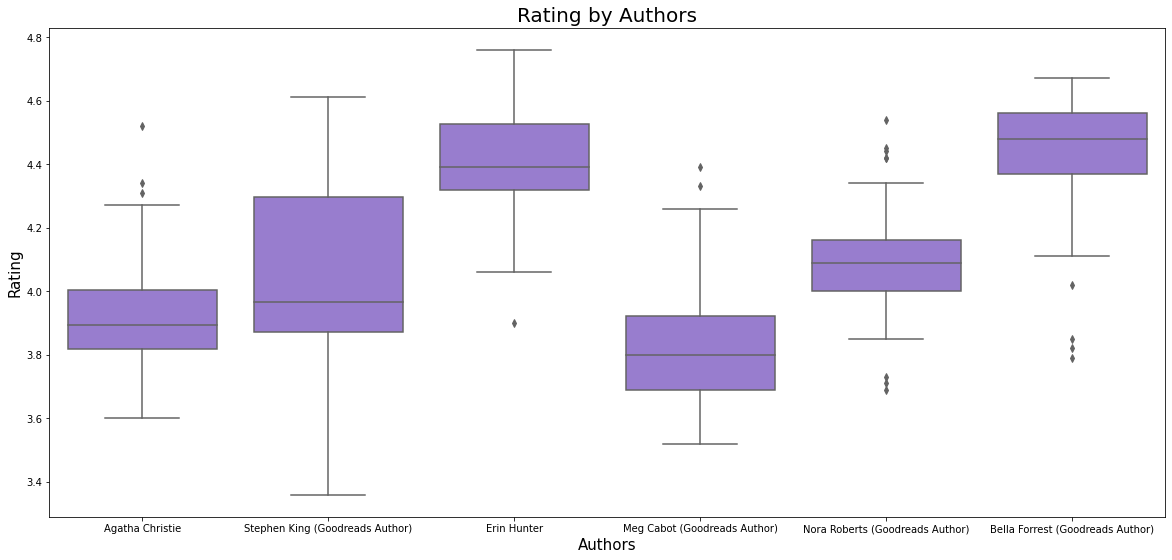

In [45]:
plt.figure(figsize=(20,9))

graph = sns.boxplot(x='author', y='rating',
                 data=book[book.author.isin(best_authors.index.values)],
                 color='mediumpurple')
graph.set_title("Rating by Authors", fontsize=20)
graph.set_xlabel("Authors", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

<AxesSubplot:title={'center':'Number of books written by authors'}, xlabel='author', ylabel='count'>

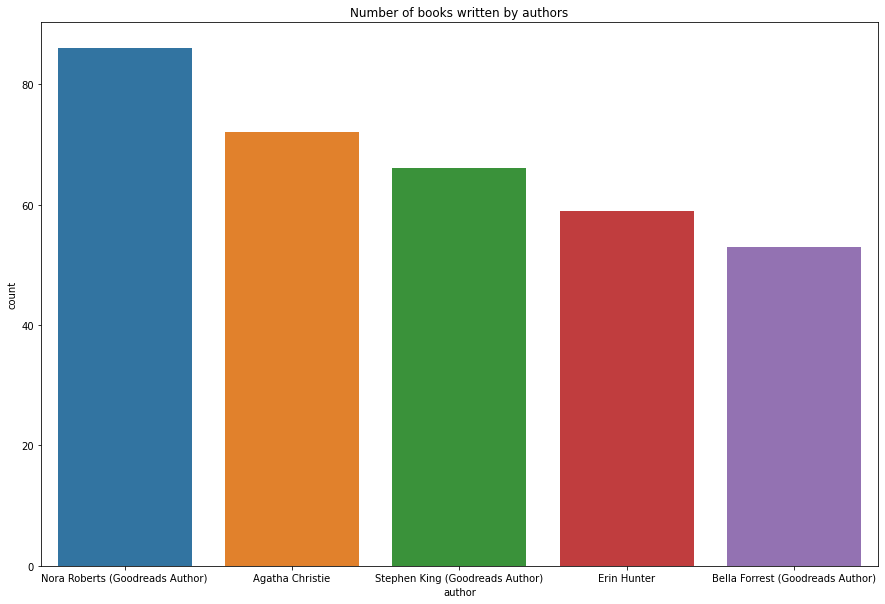

In [46]:
plt.figure(figsize=(15,10))
plt.title("Number of books written by authors")
sns.countplot(x = "author", order=book['author'].value_counts().index[0:5], data=book)

In [201]:
# TOP Rated BOOKS

top_rated_books = book.loc[book['rating'] > 4.0]
top_rated_books = top_rated_books.sort_values(by='rating', ascending=False).head(5)


top_rated_books.head(20)

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
46031,Deserter from Death: Dispatches from Western E...,"Daniel Singer, Howard Zinn (Preface by)",5.0,"A ""deserter from death,"" Polish-born Daniel Si...",English,Paper,352.0,92.231545,63,5.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28673,Blood Kiss,"Shawn William Davis (Goodreads Author), Robert...",5.0,The beautiful female students at a New England...,English,Kindle Edition,265.0,100.000000,96,14.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20344,The Constitution of the Tunisian Republic: Uno...,Med-Ali Mekki,5.0,Final Constitution of the Tunisian Republic ad...,English,ebook,40.0,100.000000,100,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
48360,Sir David: The Life and Loves of a Welsh Knight,Garner Scott Odell (Goodreads Author),5.0,Sir David is the true story of a giant Welsh w...,English,Paper,432.0,92.231545,50,17.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39225,Quail Diseases: Identification And Management ...,Francis Okumu,5.0,A quail is regarded to be in a state of good h...,English,Kindle Edition,31.0,92.231545,84,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


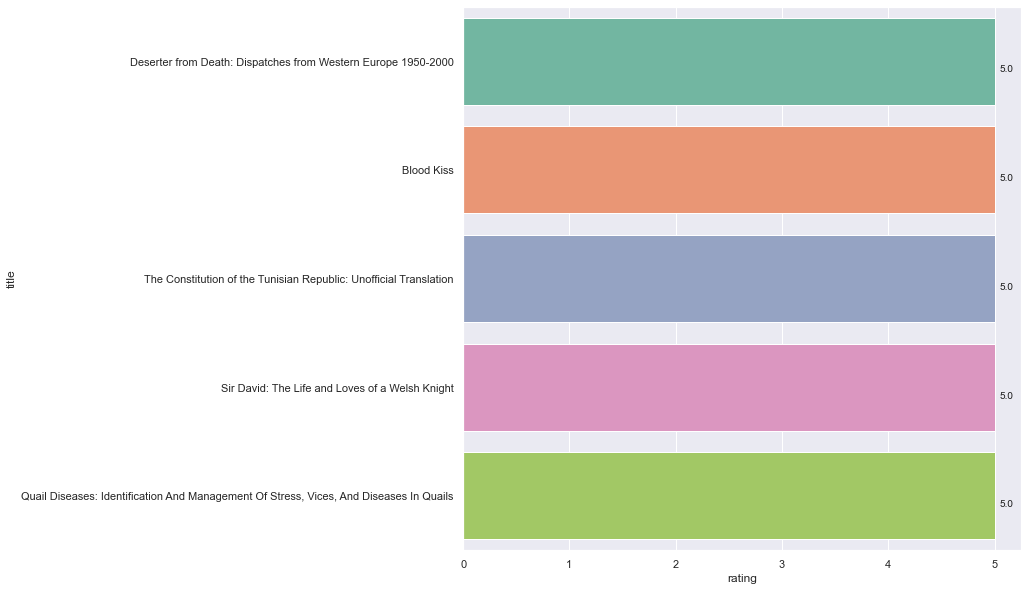

In [202]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="rating", y="title", data=top_rated_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [49]:
"""
def clean_author(x):
    if x[str.contains("Goodreads", case=False, na=False)]:
        return ''
    else:
        return x
book['author'] = list(map(clean_author, book['author']))
"""

#gonna be focused later on

'\ndef clean_author(x):\n    if x[str.contains("Goodreads", case=False, na=False)]:\n        return \'\'\n    else:\n        return x\nbook[\'author\'] = list(map(clean_author, book[\'author\']))\n'

In [50]:
book.bookFormat.value_counts()

Paper             44097
Kindle Edition     5834
ebook              2547
Name: bookFormat, dtype: int64

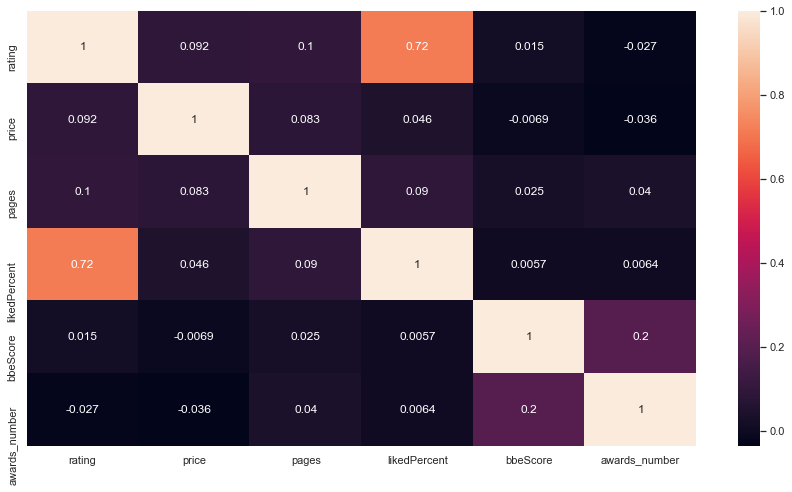

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})
correlations_matrix = book[['rating','price','pages','likedPercent', 'bbeScore', 'awards_number']].corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [52]:
### AS we see in the correlation matrix, bbeScore and bbeVotes are correlated, numberofRatings also..
#### so i will drop these columns those are correlated to each other

book = book.drop(["bbeVotes", "numRatings"], axis=1)
book.head(4)

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,96.0,2993816,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,98.0,2632233,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,95.0,2269402,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,Paper,279.0,94.0,1983116,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [53]:
# Checking if there are any dublicates.
book[book.duplicated()]

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
37431,Promises to Keep,Ann Tatlock,3.94,Eleven-year-old Roz (Rosalind) Anthony and her...,English,Paper,348.0,95.000000,87,4.23,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
37432,Click,"Eoin Colfer, Linda Sue Park, Ruth Ozeki (Goodr...",3.54,A video message from a dead person. A larcenou...,English,Paper,217.0,86.000000,87,2.60,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
37433,Die Unendlichkeit schläft,Melanie Meier,4.50,"Überall, wo er hingeht, reißen Höllenfeuer all...",German,Kindle Edition,329.0,92.231545,87,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37434,"Death Note: Black Edition, Vol. 2","Tsugumi Ohba, Takeshi Obata, Yuki Kowalsky (tr...",4.48,Intégrale regroupant les tomes 3 et 4Tome 3 :L...,German,Paper,385.0,99.000000,87,12.00,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
37435,Máscaras,Ariel Dorfman,3.49,"¿Qué se oculta detrás de esos rostros difusos,...",Spanish,Paper,159.0,81.000000,87,6.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
37436,El siglo de las luces,Alejo Carpentier,4.13,El siglo de las luces novela el impacto de la ...,Spanish,Paper,345.0,94.000000,87,0.90,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
37437,Always and Forever,Harper Bentley (Goodreads Author),3.93,Does wanting to slap the hell out of Brody Kel...,English,Kindle Edition,329.0,92.000000,87,9.66,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37438,Dafne desvanecida,José Carlos Somoza,3.48,Dafne desvanecida presenta a un famoso escrito...,Spanish,Paper,237.0,86.000000,87,4.90,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
37439,فضولية العلم,"Cyril Aydon, أحمد مغربي (ترجمة)",3.87,"ما يلفت في كتاب سيرل أيدون ""فضولية العلم"" طريق...",Arabic,Paper,280.0,91.000000,87,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
37440,"Jag vill inte dö, jag vill bara inte leva",Ann Heberlein,3.50,"Ann Heberleins omdiskuterade självbiografi""Jag...",Swedish,Paper,206.0,85.000000,87,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [54]:
book = book.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [55]:
book = book.reset_index(drop=True)

In [56]:
# after we proceed on our data, we check our shape and go to next level
book.shape

(52428, 32)

In [57]:
numericals = book.select_dtypes(np.number)
numericals

,rating,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
0,4.33,374.0,96.0,2993816,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0
1,4.50,870.0,98.0,2632233,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0
2,4.28,324.0,95.0,2269402,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0
3,4.26,279.0,94.0,1983116,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,3.60,501.0,78.0,1459448,2.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52423,4.00,0.0,94.0,0,9.66,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52424,4.19,190.0,95.0,0,9.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52425,3.70,280.0,84.0,0,7.37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
52426,3.85,507.0,90.0,0,2.86,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [58]:
categoricals = book.select_dtypes(object)

In [59]:
data = book.drop(["description","language", "bookFormat","bbeScore","price", "pages","likedPercent"], axis=1)
data.head(3)

,title,author,rating,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
0,The Hunger Games,Suzanne Collins,4.33,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0
2,To Kill a Mockingbird,Harper Lee,4.28,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0


## Web Scraping

### Best of 2021

In [60]:
from bs4 import BeautifulSoup
import requests

In [61]:
#mw-content-text > div.mw-parser-output > table > tbody > tr:nth-child(1) > td:nth-child(2) > i > a

In [62]:
url = "https://en.wikipedia.org/wiki/The_New_York_Times_Fiction_Best_Sellers_of_2021"

In [63]:
response = requests.get(url)
response.status_code

200

In [64]:
soup = BeautifulSoup(response.content, "html.parser")

In [65]:
soup.select("td:nth-child(2) > i")[0].get_text()

'A Time for Mercy'

In [66]:
books = []

num_iter = len(soup.select("td:nth-child(2) > i"))

for i in range(num_iter):
    books.append(soup.select("td:nth-child(2) > i")[i].get_text())

print(books)

['A Time for Mercy', 'The Duke and I', 'The Russian', 'The Four Winds', 'A Court of Silver Flames', 'The Four Winds', 'Life After Death', 'The Four Winds', 'Win', 'The Four Winds', 'The Hill We Climb', 'Ocean Prey', 'A Gambling Man', 'Sooley', '21st Birthday', 'While Justice Sleeps', 'The Last Thing He Told Me', 'Legacy', 'Freed', "The President's Daughter", 'The Last Thing He Told Me', 'Once Upon a Time in Hollywood', 'The Paper Palace', 'The Cellist', 'Black Ice', 'The Last Thing He Told Me', 'Billy Summers', 'Bloodless', 'The Madness of Crowds', 'A Slow Fire Burning', 'Forgotten in Death', 'Apples Never Fall', 'The Wish', 'The Lincoln Highway', 'State of Terror', "The Judge's List", 'Better Off Dead', 'Game On', 'The Dark Hours', 'Mercy', 'Go Tell the Bees That I Am Gone']


In [67]:
best2021 = pd.DataFrame({"books_name": books})
best2021 = best2021["books_name"].str.lower()

In [68]:
#mw-content-text > div.mw-parser-output > table > tbody > tr:nth-child(11) > td:nth-child(3)
soup.select("tr:nth-child(11) > td:nth-child(3)")

[<td rowspan="1"><a href="/wiki/Sarah_J._Maas" title="Sarah J. Maas">Sarah J. Maas</a>
 </td>]

In [69]:
soup.select("td:nth-child(3)")

[<td rowspan="2"><a href="/wiki/John_Grisham" title="John Grisham">John Grisham</a>
 </td>,
 <td rowspan="4"><a href="/wiki/Julia_Quinn" title="Julia Quinn">Julia Quinn</a>
 </td>,
 <td rowspan="1"><a href="/wiki/James_Patterson" title="James Patterson">James Patterson</a> and <a href="/wiki/James_O._Born" title="James O. Born">James O. Born</a>
 </td>,
 <td rowspan="2"><a href="/wiki/Kristin_Hannah" title="Kristin Hannah">Kristin Hannah</a>
 </td>,
 <td rowspan="1"><a href="/wiki/Sarah_J._Maas" title="Sarah J. Maas">Sarah J. Maas</a>
 </td>,
 <td rowspan="1">Kristin Hannah
 </td>,
 <td rowspan="1"><a href="/wiki/Sister_Souljah" title="Sister Souljah">Sister Souljah</a>
 </td>,
 <td rowspan="1">Kristin Hannah
 </td>,
 <td rowspan="1"><a class="mw-redirect" href="/wiki/Harlen_Coben" title="Harlen Coben">Harlen Coben</a>
 </td>,
 <td rowspan="1">Kristin Hannah
 </td>,
 <td rowspan="2"><a href="/wiki/Amanda_Gorman" title="Amanda Gorman">Amanda Gorman</a>
 </td>,
 <td rowspan="1"><a href="

In [70]:
soup.select("td:nth-child(3)")[0].get_text()

'John Grisham\n'

In [71]:
author = []

n_iter = len(soup.select("td:nth-child(3)"))

for i in range(n_iter):
    author.append(soup.select("td:nth-child(3)")[i].get_text())

print(author)

author = pd.DataFrame({"author":author})

['John Grisham\n', 'Julia Quinn\n', 'James Patterson and James O. Born\n', 'Kristin Hannah\n', 'Sarah J. Maas\n', 'Kristin Hannah\n', 'Sister Souljah\n', 'Kristin Hannah\n', 'Harlen Coben\n', 'Kristin Hannah\n', 'Amanda Gorman\n', 'John Sandford\n', 'David Baldacci\n', 'John Grisham\n', 'James Patterson and Maxine Paetro\n', 'Stacey Abrams\n', 'Laura Dave\n', 'Nora Roberts\n', 'E. L. James\n', 'Bill Clinton and James Patterson\n', 'Laura Dave\n', 'Quentin Tarantino\n', 'Miranda Cowley Heller\n', 'Daniel Silva\n', 'Brad Thor\n', 'Laura Dave\n', 'Stephen King\n', 'Douglas Preston and Lincoln Child\n', 'Louise Penny\n', 'Paula Hawkins\n', 'J. D. Robb\n', 'Liane Moriarty\n', 'Nicholas Sparks\n', 'Amor Towles\n', 'Hillary Rodham Clinton and Louise Penny\n', 'John Grisham\n', 'Lee Child and Andrew Child\n', 'Janet Evanovich\n', 'Michael Connelly\n', 'David Baldacci\n', 'Diana Gabaldon\n']


In [72]:
author

,author
0,John Grisham\n
1,Julia Quinn\n
2,James Patterson and James O. Born\n
3,Kristin Hannah\n
4,Sarah J. Maas\n
5,Kristin Hannah\n
6,Sister Souljah\n
7,Kristin Hannah\n
8,Harlen Coben\n
9,Kristin Hannah\n


In [73]:
for i in range(len(author.author)):
    author['author'][i] = author['author'][i].replace('\n','')
    author['author'][i] = author['author'][i].lower()

In [74]:
bestof2021 = pd.concat([author,best2021], axis = 1)

In [75]:
bestof2021

,author,books_name
0,john grisham,a time for mercy
1,julia quinn,the duke and i
2,james patterson and james o. born,the russian
3,kristin hannah,the four winds
4,sarah j. maas,a court of silver flames
5,kristin hannah,the four winds
6,sister souljah,life after death
7,kristin hannah,the four winds
8,harlen coben,win
9,kristin hannah,the four winds


In [76]:
bestof2021.to_csv('best2021.csv')

### CLUSTERING the data.. lets see

In [77]:
numericals

,rating,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general
0,4.33,374.0,96.0,2993816,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0
1,4.50,870.0,98.0,2632233,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0
2,4.28,324.0,95.0,2269402,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0
3,4.26,279.0,94.0,1983116,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,3.60,501.0,78.0,1459448,2.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52423,4.00,0.0,94.0,0,9.66,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52424,4.19,190.0,95.0,0,9.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52425,3.70,280.0,84.0,0,7.37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
52426,3.85,507.0,90.0,0,2.86,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [95]:
# not gonna use it
#tocluster = numericals.drop(["rating", "pages", "likedPercent", "bbeScore", "price", "awards_number"], axis=1)

In [78]:
from sklearn.cluster import KMeans

In [155]:
# CLUSTERED by the genres and main numerical columns

In [79]:
# Now after getting our dataset .. we gonna build our model.

scaler= StandardScaler().fit(numericals)
X_prep = scaler.transform(numericals)

In [150]:
import pickle
pickle.dump(scaler, open('standard.pkl', 'wb'))

In [80]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=0)

In [151]:
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [81]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    11406
1     8760
2     6242
3    16501
4      983
5     3362
6      186
7     1794
8      526
9     2668
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

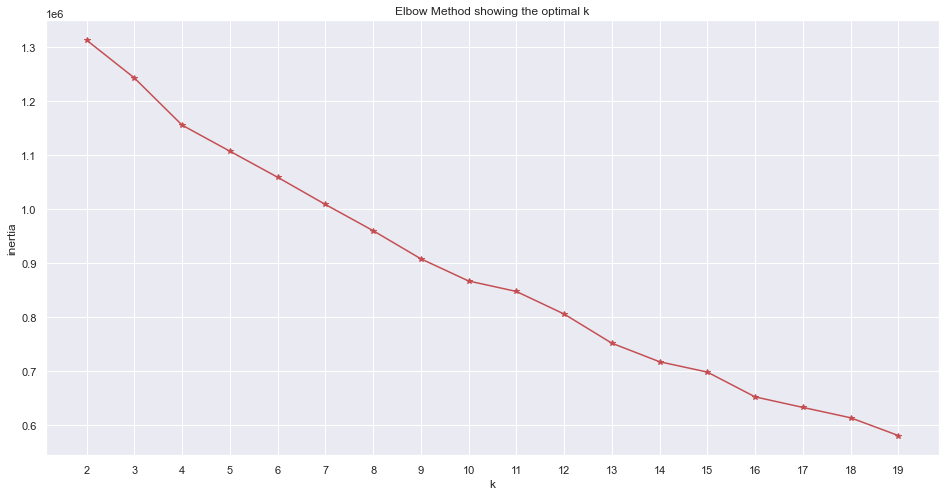

In [82]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')   

In [83]:
kmeans.inertia_

580005.8644022151

In [84]:
categoricals

,title,author,description,language,bookFormat
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,English,Paper
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,Paper
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,English,Paper
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,English,Paper
...,...,...,...,...,...
52423,Fractured,Cheri Schmidt (Goodreads Author),The Fateful Trilogy continues with Fractured. ...,English,Paper
52424,Anasazi,Emma Michaels,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,Paper
52425,Marked,Kim Richardson (Goodreads Author),--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,Paper
52426,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,Paper


In [86]:
book_final = pd.concat([book, pd.Series(clusters)],axis=1)
book_final = book_final.dropna()
book_final.head(3)

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general,0
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,96.0,2993816,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0,0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,98.0,2632233,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0,0
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,95.0,2269402,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0,0


In [87]:
book_final = book_final.rename(columns={0:'clustered'})
book_final

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general,clustered
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,Paper,374.0,96.0,2993816,5.09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,41,0,0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,Paper,870.0,98.0,2632233,7.38,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,9,0,0
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,Paper,324.0,95.0,2269402,9.66,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,4,0,0
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,Paper,279.0,94.0,1983116,9.66,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,3
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,Paper,501.0,78.0,1459448,2.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52423,Fractured,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,Paper,0.0,94.0,0,9.66,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
52424,Anasazi,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,Paper,190.0,95.0,0,9.66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
52425,Marked,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,Paper,280.0,84.0,0,7.37,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
52426,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,Paper,507.0,90.0,0,2.86,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3


In [88]:
book_final["clustered"].value_counts()

3    16501
0    11406
1     8760
2     6242
5     3362
9     2668
7     1794
4      983
8      526
6      186
Name: clustered, dtype: int64

In [176]:
book_final[book_final["clustered"] == 6]

,title,author,rating,description,language,bookFormat,pages,likedPercent,bbeScore,price,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,humor,poetry,classics,drama,young_adult,childrens,historical,contemporary,graphic,nonfiction,philosophy,feminism,gender,fiction,awards_number,general,clustered
654,The Left Hand of Darkness,Ursula K. Le Guin,4.07,"A groundbreaking work of science fiction, The ...",English,Paper,304.0,94.0,12060,9.66,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,4,0,6
1727,The Second Sex,"Simone de Beauvoir, H.M. Parshley (Translator ...",4.13,Newly translated and unabridged in English for...,English,Paper,746.0,95.0,2489,10.98,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,6
2967,We Should All Be Feminists,Chimamanda Ngozi Adichie,4.45,What does “feminism” mean today? That is the q...,English,Kindle Edition,52.0,98.0,1174,9.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,6
3091,Women Who Run With the Wolves: Myths and Stori...,Clarissa Pinkola Estés,4.10,Within every woman there is a wild and natural...,English,Paper,560.0,90.0,1104,8.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,6
3223,The Feminine Mystique,"Betty Friedan, Anna Quindlen (Introduction)",3.86,The book that changed the consciousness of a c...,English,Paper,430.0,92.0,1045,8.36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,6
3342,Goblinheart,"Brett Axel (Goodreads Author), Terra Bidlespac...",4.44,"Using ""fairy"" and ""goblin"" in lieu of female a...",English,Paper,40.0,94.0,997,70.19,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,6
3491,Stone Butch Blues,Leslie Feinberg,4.35,Woman or man? This internationally acclaimed n...,English,Paper,308.0,96.0,940,87.48,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,2,0,6
3902,The Art of Being Normal,Lisa Williamson (Goodreads Author),4.06,Two boys. Two secrets.David Piper has always b...,English,Paper,353.0,94.0,809,3.11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,3,0,6
4571,Half the Sky: Turning Oppression Into Opportun...,"Nicholas D. Kristof (Goodreads Author), Sheryl...",4.29,"From two of our most fiercely moral voices, a ...",English,Paper,294.0,96.0,664,3.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,6
4584,The Vagina Monologues,"Eve Ensler, Gloria Steinem (Foreword)",3.88,I decided to talk to women about their vaginas...,English,Paper,185.0,91.0,661,3.95,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,6


In [89]:
## LETS save the project to a csv file

book_final.to_csv('tbook.csv',index=False)

## TRY to make a model

In [213]:
#FOR PRACTICING

In [135]:
b2021 = pd.read_csv('best2021.csv')
b2021

,Unnamed: 0,author,books_name
0,0,john grisham,a time for mercy
1,1,julia quinn,the duke and i
2,2,james patterson and james o. born,the russian
3,3,kristin hannah,the four winds
4,4,sarah j. maas,a court of silver flames
5,5,kristin hannah,the four winds
6,6,sister souljah,life after death
7,7,kristin hannah,the four winds
8,8,harlen coben,win
9,9,kristin hannah,the four winds


In [129]:
bestof2021["Book_by"] = bestof2021["books_name"] + " by " + bestof2021["author"]
bestof2021 = bestof2021[["Book_by"]]
bestof2021

,Book_by
0,a time for mercy by john grisham
1,the duke and i by julia quinn
2,the russian by james patterson and james o. born
3,the four winds by kristin hannah
4,a court of silver flames by sarah j. maas
5,the four winds by kristin hannah
6,life after death by sister souljah
7,the four winds by kristin hannah
8,win by harlen coben
9,the four winds by kristin hannah


# ITS OUR MODEL.. IRON BOOK STORE :)

In [ ]:
#This is just an idea, if we would cluster by the auther..

#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#books_author = min_max_scaler.fit_transform(authors)

In [193]:
# Neighbors for the clustered one.. So you gonna get similar books by cluster.

from sklearn.neighbors import NearestNeighbors
kdtree_nbrs = NearestNeighbors(n_neighbors =7,algorithm ="brute").fit(book_final[["clustered"]])
kd_distances, kd_indices = kdtree_nbrs.kneighbors(book_final[["clustered"]])

In [194]:
pickle.dump(kdtree_nbrs, open('neighbor.pkl', 'wb'))

In [195]:
#return a book title name based on book index
def get_index_from_name(name):
    return book_final[book_final["title"]==name].index.tolist()[0]

In [196]:
all_books_title = list(book_final.title.values)

def get_id_from_partial_title(partial):
    count = 6
    df1 = pd.DataFrame(columns =['title', 'rating'])
    for title in all_books_title:
        if partial in title and (count != 0):
            print(title)
            count-=1
    return count

In [197]:
#query is for based on book title 
# any purposes you can also use the book id

def kd_print_similar_books(query=None,id=None):
    if id: 
        for id in kd_indices[id][1:]:
            print(book_final.loc[id]["title"])
    if query:
        found_id = get_index_from_name(query)
        for id in kd_indices[found_id][1:]:
            print(book_final.loc[id]["title"])

In [219]:
def tekin():
    import time
    import random

    print("Welcome to Iron Book Store..")
    time.sleep(1)
    print("This is your new book recommender by IronHack")

    user_book = ""

    while user_book != "0":
        print("---> Enter 0 to exit the system <---")
        user_book = input("Enter a book name please --> ")
    
        #checking whether the book title exist in the dataset
        exists = user_book in book_final.title.values
    
        if (user_book == "0"):
            print("See you later")
            time.sleep(1)
            print("Hope you enjoy in IronStore :)")
            break
        
        elif user_book in list(b2021['books_name']):
            #book is in top 2021 
            #recommend from that list  
            print("")
            print("Try that book also --> " + random.choice(bestof2021['Book_by']))
            print("...")
    
        elif (exists == False):
            #book does not exist 
            #give similar book and also from 2021
            print("")
            print("The book you are searching for does not exist.")
            print("Searching related books...")
            print("...")
        
            #checking whether the partial title return a value 
            count_return = get_id_from_partial_title(user_book)
        
            print("Don't get lost, have a look at this book: " + random.choice(bestof2021['Book_by']))           
            print("")
        else:
            #book exist 
            #perform nearest neighbor sorting 
            print("")
            print("Books that you may like")
            print("-----------------------")
            time.sleep(1)
            kd_print_similar_books(user_book)
            print("")
            
tekin()

Welcome to Iron Book Store..
This is your new book recommender by IronHack
---> Enter 0 to exit the system <---
Enter a book name please --> Green

The book you are searching for does not exist.
Searching related books...
...
Anne of Green Gables
Green Eggs and Ham
The Green Mile
Fried Green Tomatoes at the Whistle Stop Cafe
How Green Was My Valley
The Complete Anne of Green Gables Boxed Set
Don't get lost, have a look at this book: the last thing he told me by laura dave

---> Enter 0 to exit the system <---
Enter a book name please --> 0
See you later
Hope you enjoy in IronStore :)
